<img src="https://files.ai-pool.com/a/ef3110c85caab3175a2e07de780854cb.png">

# Support Vector Machine

<img src="https://appliedmachinelearning.files.wordpress.com/2017/03/svm_logo1.png?w=392">

**The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.**

**Margin - distance from the decision surface to the closest data point determines the margin of the classifier**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img src="https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png">

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df[df.target == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

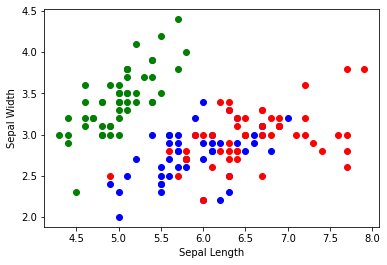

In [9]:
import matplotlib.pyplot as plt 
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')

plt.show()



**Train using SVM**

In [10]:
from sklearn.model_selection import train_test_split
x = df.drop(['target', 'flower_name'], axis="columns")
y = df.target 
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)


In [12]:
len(x_train)

135

In [14]:
len(y_train)

135

In [15]:
from sklearn.svm import SVC 
model = SVC()

In [16]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
model.score(x_test, y_test)

0.9333333333333333

In [18]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1])

In [28]:

y_predicted.shape

(15,)

In [30]:
iris.target_names[y_predicted]

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predicted)
cm

array([[4, 0, 0],
       [0, 5, 0],
       [0, 1, 5]], dtype=int64)

<AxesSubplot:>

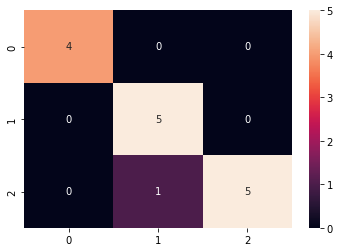

In [33]:
import seaborn as sns 
sns.heatmap(cm, annot = True)


<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_15.png">

# Gamma in SVM

In [34]:
model_g = SVC(gamma = 10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

1.0